In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

music = pd.DataFrame()
music['duration'] = [184, 134, 243, 186, 122, 197, 294, 382, 102, 264, 
                     205, 110, 307, 110, 397, 153, 190, 192, 210, 403,
                     164, 198, 204, 253, 234, 190, 182, 401, 376, 102]
music['duration'] = stats.zscore(music['duration'])
music['loudness'] = [18, 34, 43, 36, 22, 9, 29, 22, 10, 24, 
                     20, 10, 17, 51, 7, 13, 19, 12, 21, 22,
                     16, 18, 4, 23, 34, 19, 14, 11, 37, 42]
music['loudness'] = stats.zscore(music['loudness'])
music['bpm'] = [ 105, 90, 78, 75, 120, 110, 80, 100, 105, 60,
                  70, 105, 95, 70, 90, 105, 70, 75, 102, 100,
                  100, 95, 90, 80, 90, 80, 100, 105, 70, 65]

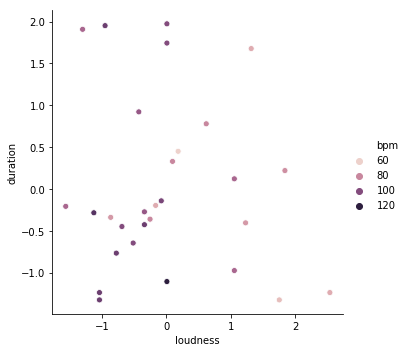

In [2]:
sns.relplot(x='loudness', y='duration', hue='bpm', data=music);

In [49]:
from sklearn import neighbors

# Build our model.
knn = neighbors.KNeighborsRegressor(n_neighbors=7)
X = pd.DataFrame(music[['loudness', 'duration']])
Y = music.bpm
knn.fit(X, Y)

# Set up our prediction line.
# T = np.arange(0, 50, 0.1)[:, np.newaxis]
# T1 = np.linspace(100, 400, 500)[:, np.newaxis]
T = np.random.rand(500)*50
T1 = (np.random.rand(500) + 100)*4

Test = pd.DataFrame()
Test['loudness'] = stats.zscore(T)
Test['duration'] = stats.zscore(T1)
# Trailing underscores are a common convention for a prediction.
Y_ = knn.predict(Test)

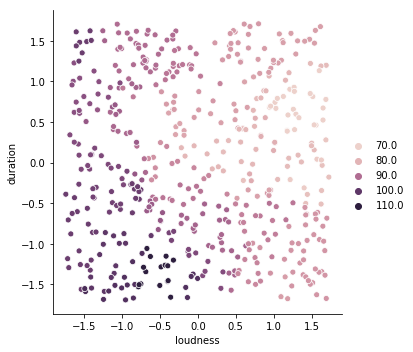

In [50]:
sns.relplot(x='loudness', y='duration', data=Test, hue=Y_);

In [51]:
knn_w = neighbors.KNeighborsRegressor(n_neighbors=7, weights='distance')
knn_w.fit(X, Y)

Y_1 = knn_w.predict(X)

In [52]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(knn, X, Y, cv=5)
print("Unweighted Accuracy: %0.2f (+/- %0.2f)" % (score.mean(), score.std() * 2))
score_w = cross_val_score(knn_w, X, Y, cv=5)
print("Weighted Accuracy: %0.2f (+/- %0.2f)" % (score_w.mean(), score_w.std() * 2))

Unweighted Accuracy: -0.43 (+/- 1.66)
Weighted Accuracy: -0.37 (+/- 1.86)
